In [3]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# 학습셋과 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\BIT\anaconda3\envs\data-anal-env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\BIT\anaconda3\envs\data-anal-env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. 

In [5]:
# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [8]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                 0

In [10]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
250/250 [==============================] - 15s 60ms/step - loss: 0.4520 - accuracy: 0.7692 - val_loss: 0.3321 - val_accuracy: 0.8542
Epoch 2/5
250/250 [==============================] - 14s 56ms/step - loss: 0.2913 - accuracy: 0.8781 - val_loss: 0.3234 - val_accuracy: 0.8569
Epoch 3/5
250/250 [==============================] - 14s 56ms/step - loss: 0.2499 - accuracy: 0.8985 - val_loss: 0.3289 - val_accuracy: 0.8568
Epoch 4/5
250/250 [==============================] - 14s 56ms/step - loss: 0.2135 - accuracy: 0.9164 - val_loss: 0.3380 - val_accuracy: 0.8536
Epoch 5/5
250/250 [==============================] - 14s 56ms/step - loss: 0.1765 - accuracy: 0.9325 - val_loss: 0.3600 - val_accuracy: 0.8528


In [12]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 4s 6ms/step - loss: 0.3600 - accuracy: 0.8528: 0s - loss: 0.3624 - 

 Test Accuracy: 0.8528


In [13]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

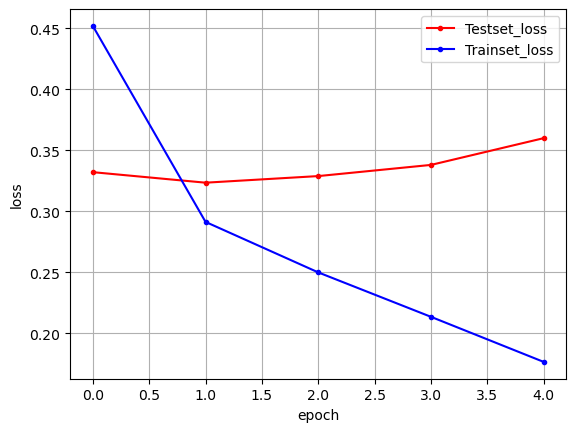

In [15]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()